In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import os 
import cv2
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics

In [3]:
from sklearn.model_selection import GridSearchCV, train_test_split

In [4]:
from sklearn.svm import SVC

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

file path did not work
file path did not work
file path did not work


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 613 extraneous bytes before marker 0xd9


file path did not work


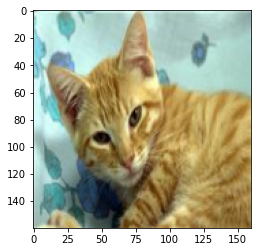

In [6]:
data = []
dirpath = "" # your dir
folders = ['bombay', 'siamese', 'tabby']
for folder in folders:
    path = os.path.join(dirpath, folder)
    for img_path in os.listdir(path):
        try: 
            image_arr = cv2.imread(os.path.join(path, img_path))
            img_rgb=cv2.cvtColor(image_arr, cv2.COLOR_BGR2RGB)
            new_array = cv2.resize(img_rgb,(160, 160))
            data.append([new_array, folders.index(folder)])
            plt.imshow(new_array)
        except:
            print("file path did not work")

In [7]:
len(data)

796

In [8]:
X = []
y = []
for feature, label in data:
    X.append(feature)
    y.append(label)

In [9]:
X = np.array(X)

In [10]:
X.shape

(796, 160, 160, 3)

In [11]:
# graph_y = pd.Series(y).map({0:'abyssinian', 1:'american_bobtail', 2:'british_shorthair'})
graph_y = pd.Series(y).map({0:'orange tabby', 1:'siamese', 2: 'bombay'})

Text(0.5, 0, 'Cat breeds')

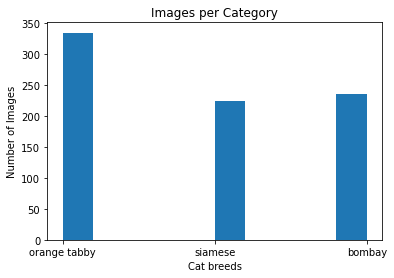

In [12]:
plt.hist(graph_y)
plt.title('Images per Category')
plt.ylabel('Number of Images')
plt.xlabel('Cat breeds')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1234)

In [14]:
#Normalize the scale to 0-1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [15]:
X_train.shape

(597, 160, 160, 3)

In [16]:
cats_train = []
for i, img in enumerate(X_train):
    train = pd.Series(img.flatten(), name = i)
    cats_train.append(train)

In [17]:
cats_test=[]
for a, each in enumerate(X_test):
    cat_test = pd.Series(each.flatten(), name = a)
    cats_test.append(cat_test)

In [18]:
np.array(cats_train).shape, np.array(cats_test).shape

((597, 76800), (199, 76800))

In [19]:
model = LogisticRegression()

In [20]:
model.fit(cats_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
log_pred = model.predict(cats_test)
log_pred

array([1, 2, 2, 0, 2, 2, 2, 1, 1, 2, 0, 2, 1, 1, 0, 2, 0, 1, 0, 0, 1, 2,
       1, 1, 0, 0, 2, 1, 2, 1, 1, 1, 2, 0, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2,
       0, 2, 1, 1, 0, 2, 0, 2, 2, 1, 2, 2, 1, 2, 0, 0, 2, 0, 0, 1, 2, 0,
       2, 1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 1, 2, 0, 1, 0, 0, 0, 2, 2, 2,
       0, 1, 2, 0, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 1, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 0, 0, 2, 0, 1, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1,
       2, 1, 1, 0, 0, 0, 2, 1, 2, 2, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 2,
       1, 0, 1, 1, 2, 1, 2, 1, 1, 0, 2, 0, 2, 0, 1, 0, 2, 1, 1, 0, 1, 2,
       1, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 1, 2, 2, 0, 0, 1, 1, 2, 0, 0, 2,
       0])

In [22]:
y_pred_proba = model.predict_proba(cats_test)[:,1]
y_pred_proba.round(2)

array([1.  , 0.  , 0.47, 0.  , 0.01, 0.  , 0.25, 1.  , 0.63, 0.  , 0.01,
       0.02, 0.77, 0.99, 0.  , 0.31, 0.  , 0.94, 0.  , 0.15, 0.86, 0.08,
       0.57, 1.  , 0.  , 0.07, 0.  , 0.96, 0.  , 0.85, 0.98, 0.53, 0.01,
       0.04, 0.  , 0.  , 0.99, 0.01, 0.  , 0.  , 0.  , 0.  , 0.63, 0.  ,
       0.  , 0.  , 1.  , 0.49, 0.  , 0.  , 0.  , 0.  , 0.07, 1.  , 0.01,
       0.  , 1.  , 0.17, 0.  , 0.35, 0.13, 0.34, 0.  , 0.98, 0.  , 0.09,
       0.47, 1.  , 0.01, 0.  , 1.  , 0.  , 0.  , 0.  , 0.01, 0.1 , 0.4 ,
       0.  , 1.  , 0.21, 0.  , 0.95, 0.03, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.26, 0.6 , 0.03, 0.  , 0.  , 0.  , 0.  , 0.82, 0.01, 0.01, 0.  ,
       0.  , 0.02, 0.  , 1.  , 0.01, 0.  , 0.06, 0.  , 0.9 , 0.  , 0.38,
       0.  , 0.  , 0.  , 1.  , 0.99, 0.  , 0.85, 0.  , 0.  , 0.37, 0.  ,
       1.  , 0.  , 0.07, 0.  , 0.  , 1.  , 0.8 , 0.  , 0.  , 0.  , 0.74,
       0.  , 1.  , 0.99, 0.  , 0.  , 0.07, 0.03, 0.94, 0.  , 0.16, 0.81,
       0.  , 0.18, 0.01, 0.  , 0.  , 0.  , 0.06, 0.

In [23]:
results = pd.DataFrame({'predicted': log_pred,
                        'actual': y_test})

In [24]:
results.head()

,predicted,actual
0,1,1
1,2,2
2,2,2
3,0,0
4,2,2


In [25]:
# Helper fuctions to evaluate our model. 
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix 

accuracy = accuracy_score(y_test, log_pred)

print("Accuracy Score: %f" % accuracy)

Accuracy Score: 0.788945


In [26]:
model = LinearRegression()

In [27]:
model.fit(cats_train, y_train)

LinearRegression()

In [28]:
lin_pred = model.predict(cats_test)
lin_pred

array([ 5.4144067e-01,  1.5217140e+00,  1.8851871e+00, -1.3708359e-01,
        2.0138047e+00,  2.0000021e+00,  4.3221682e-01,  1.1766746e+00,
        1.8454950e+00,  4.3121478e-01,  3.7182128e-01,  1.0904424e+00,
        1.0018938e+00,  5.8119059e-01, -6.0528211e-02,  1.6801019e+00,
        5.0356370e-01,  1.0839186e+00, -7.1544677e-02,  3.2834381e-01,
        1.1752956e+00,  1.8345404e+00,  3.6448130e-01,  9.1131371e-01,
        2.0692903e-01, -3.2635218e-01,  1.4869802e+00,  6.8021929e-01,
        1.8132019e+00,  1.2604418e+00,  8.0509412e-01,  1.5454235e+00,
        2.0195134e+00,  5.0874299e-01,  1.4934473e+00,  2.1774936e-01,
        6.7572737e-01,  2.1520247e+00,  2.0842669e+00,  6.8563268e-02,
        1.4258947e+00, -2.4919230e-01,  5.2755076e-01,  2.7418058e+00,
        2.3468527e-01,  1.9374132e+00,  8.8079441e-01,  7.2700709e-01,
       -1.2462368e-01,  2.1324229e+00, -1.1111815e-01,  1.5766840e+00,
        2.0026345e+00,  4.9639583e-01,  1.7250197e+00,  1.9841871e+00,
      

In [29]:
r_squared = metrics.r2_score(y_test, lin_pred)
print('R-Squared Score:', r_squared)

R-Squared Score: 0.6853125580704268


In [30]:
mae = metrics.mean_absolute_error(y_test, lin_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.35859935944104315


In [31]:
model = svm.SVC()

In [32]:
model.fit(cats_train, y_train)

SVC()

In [33]:
svm_pred = model.predict(cats_test)

In [34]:
model.score(cats_test, y_test)

0.8492462311557789

In [35]:
results = pd.DataFrame({'predicted': svm_pred,
                        'actual': y_test})

In [36]:
results.head()

,predicted,actual
0,1,1
1,2,2
2,1,2
3,0,0
4,2,2


In [38]:
def visual_result(i):
    name_list = ['bombay', 'siamese', 'tabby']
    plt.imshow(np.array(cats_test[i]).reshape(160, 160, 3),
               interpolation='nearest')
    plt.show()
    print(f'The model guessed this was: {name_list[results["predicted"].iloc[i]]}.')
    print(f'This actually is: {name_list[results["actual"].iloc[i]]}.')
    print()

In [39]:
row_inds = results[results['predicted'] != results['actual']].index

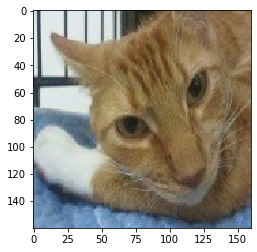

The model guessed this was: siamese.
This actually is: tabby.



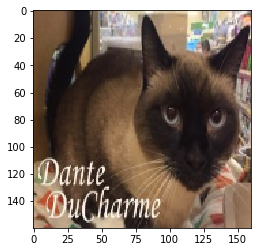

The model guessed this was: bombay.
This actually is: siamese.



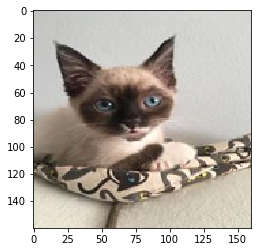

The model guessed this was: tabby.
This actually is: siamese.



In [40]:
#show the top 3 misclassified pictures
for index in row_inds[:3]:
    visual_result(index)

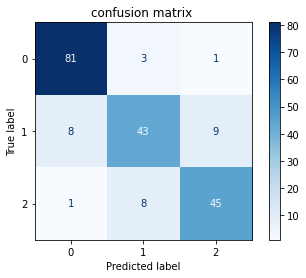

In [41]:
plot_confusion_matrix(model, cats_test, y_test, cmap = 'Blues', values_format = 'd')
plt.title('confusion matrix ');

In [42]:
# # Saving and exporting our model for future use.
import pickle

# # NAME YOUR MODEL 
# filename = 'pic1.pkl'

# # EXPORT AND SAVE YOUR MODEL USING YOUR FILENAME
# pickle.dump(model, open(filename, 'wb'))
# ## HOW TO LOAD IT FOR FUTURE USE
# model = pickle.load(open(filename, 'rb'))

# model.predict(one_row_of_data.T.values)

NameError: name 'one_row_of_data' is not defined

In [43]:
pickle.dump(model, open('model.pkl', 'wb'))

In [45]:
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.predict(cats_test)

array([1, 2, 1, 0, 2, 2, 0, 2, 2, 0, 0, 1, 1, 1, 0, 2, 0, 1, 0, 0, 1, 2,
       0, 1, 0, 0, 0, 1, 2, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 0, 1, 2,
       0, 2, 1, 1, 0, 2, 0, 2, 2, 1, 2, 1, 1, 2, 0, 0, 1, 0, 0, 2, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 1, 2,
       0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 1, 0, 2, 0, 0,
       0, 2, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 2, 2, 0, 0, 1, 2, 2, 1, 0, 1,
       1, 1, 0, 2, 0, 0, 1, 2, 2, 2, 2, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 2,
       0, 0, 0, 1, 2, 1, 2, 1, 1, 0, 0, 0, 2, 2, 1, 0, 2, 2, 1, 0, 0, 2,
       1, 2, 1, 0, 0, 2, 0, 2, 0, 0, 2, 1, 2, 2, 0, 0, 1, 2, 1, 0, 0, 2,
       0])

In [46]:
# loading library
import pickle

In [47]:
# # create an iterator object with write permission - model.pkl
# with open('model_pk2', 'wb') as files:
#     pickle.dump(model, files)

In [49]:
# # load saved model
# with open('model_pk2' , 'rb') as f:
#     lr = pickle.load(f)

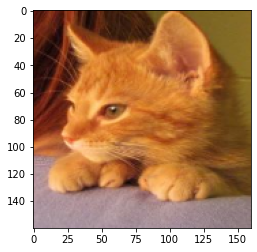

In [55]:
# img_path = ""
# plt.imshow(img)
# plt.show()

In [56]:
# # check prediction
# lr.predict(img_path) # similar

ValueError: could not convert string to float: '/Users/lilyliang/Downloads/archive 2/images/Oriental Tabby/9967738_678.jpg'

In [ ]:
# import pickle
# file = 'wine_quality'
# #save file
# save = pickle.dump(rnd,open(file,'wb'))